🔗 [Back to Table of Contents](https://github.com/najaeda/najaeda-tutorials#-table-of-contents)
# Chapter 1: Getting Started with najaeda

Welcome to **najaeda**! This guide will help you quickly install and start using the `najaeda` Python package to accelerate your EDA workflows.

📚 **API Documentation:**  
You can find the full API reference at [najaeda.readthedocs.io](https://najaeda.readthedocs.io/en/latest/)

💬 **Feedback & Contributions:**  
If you encounter bugs, have feature requests, or suggestions for improvement, please open an issue in our [GitHub issue tracker](https://github.com/najaeda/naja/issues).

⭐ **Support the Project:**  
If you find this project useful, consider [starring the repository](https://github.com/najaeda/naja) to show your support and help others discover it.

📧 **Contact Us**  
For questions, feedback, or direct communication, you can email us at [contact@keplertech.io](mailto:contact@keplertech.io) or join the **Naja** Matrix chat:

[![Join Matrix Chat →](https://img.shields.io/badge/Matrix-Join%20Chat-success?logo=matrix)](https://matrix.to/#/#naja:fossi-chat.org)

## Introduction

**najaeda** is a powerful yet lightweight framework that empowers both software and hardware developers to efficiently explore, manipulate, and prototype electronic design automation (EDA) workflows.

Designed with flexibility and usability in mind, `najaeda` enables you to:

### Explore Netlists with Ease

- Intuitively navigate complex netlist hierarchies and connectivity.
- Inspect your design at various levels of abstraction:
  - Bit-level and bus-level granularity.
  - Instance-by-instance views or fully flattened representations down to primitives.
  - Focused per-instance connectivity or holistic equipotential (net-driven) views.

### Perform ECO (Engineering Change Order) Transformations

- Apply and manage design modifications smoothly.
- Accelerate the integration of late-stage design changes with confidence and control.

### Prototype EDA Concepts Rapidly

- Leverage an intuitive and expressive Python API.
- Experiment with new ideas, workflows, or data models in minutes, not days.

### Build Custom EDA Tools

- Develop high-performance, task-specific tools without depending on expensive, proprietary EDA suites.
- Solve domain-specific challenges with code that’s lean, readable, and maintainable.

To start, let's install `najaeda` by simply using pip:

In [18]:
pip install najaeda

Note: you may need to restart the kernel to use updated packages.


## First simple design: a full adder
We'll start with a simple example.

![FullAdder](https://raw.githubusercontent.com/najaeda/najaeda-tutorials/main/images/fulladder.png)

This design contains two levels of hierarchy with top fulladder design instantiating two instances (h1 and h2) of the halfadder design.

The design is composed of a few lines of verilog, we'll now create the `fulladder.v` file directly in this notebook.


In [19]:
%%writefile fulladder.v
module halfadder(
    input a,
    input b,
    output sum,
    output carry
);
    and carry_and(carry, a, b);
    xor sum_xor(sum, a, b);
endmodule

module fulladder(
    input a,
    input b,
    input cin,
    output sum,
    output cout
);
    wire sum1, carry1, carry2;
    halfadder ha1(
        .a(a),
        .b(b),
        .sum(sum1),
        .carry(carry1)
    );
    halfadder ha2(
        .a(sum1),
        .b(cin),
        .sum(sum),
        .carry(carry2)
    );
    or cout_or(cout, carry1, carry2);
endmodule


Writing fulladder.v


## Import najaeda
Now we will import najaeda needed package:

In [20]:
from najaeda import netlist

## Load a verilog design
You can now load a gate level netlist using the loaded library.

In [21]:
top = netlist.load_verilog('fulladder.v')

RuntimeError: SNL exception: NLLibrary DESIGN contains already a SNLDesign named: halfadder

## Explore the design
We can now start browsing some characteristics of the design.

In [ ]:
print(f'The top is named {top.get_name()}')
print(f'{top} number of input terms: {top.count_input_terms()}')
print(f'{top} number of output terms: {top.count_output_terms()}')

The top is named fulladder
fulladder number of input terms: 3
fulladder number of output terms: 2


### Explore Instances
Let's start by exploring [instances](https://najaeda.readthedocs.io/en/latest/instance.html). In the top, we can browse all instances.

In [ ]:
for inst in top.get_child_instances():
    print(f'Instance {inst.get_name()} with model: {inst.get_model_name()}')

Instance ha1 with model: halfadder
Instance ha2 with model: halfadder
Instance cout_or with model: or_2


It's also possible to retrieve instances by name.

In [ ]:
ha1 = top.get_child_instance('ha1')
ha2 = top.get_child_instance('ha2')
cout_or = top.get_child_instance('cout_or')
print(f'Instance {ha1.get_name()} with model: {ha1.get_model_name()}')
print(f'Instance {ha2.get_name()} with model: {ha2.get_model_name()}')
print(f'Instance {cout_or.get_name()} with model: {cout_or.get_model_name()}')

Instance ha1 with model: halfadder
Instance ha2 with model: halfadder
Instance cout_or with model: or_2


We can also simply count the instances.

In [ ]:
print(f'The number of instances in the design is: {top.count_child_instances()}')

The number of instances in the design is: 3


We can continue to explore the hierarchy by entering into *ha1* and *ha2*.

In [ ]:
ha1_carry_and = ha1.get_child_instance('carry_and')
ha2_carry_and = ha2.get_child_instance('carry_and')
print(f'Instance {ha1_carry_and} with model: {ha1_carry_and.get_model_name()}')
print(f'Instance {ha2_carry_and} with model: {ha2_carry_and.get_model_name()}')

Instance ha1/carry_and with model: and_2
Instance ha2/carry_and with model: and_2


As expected, both instances share the same model: a and gate.

We could have retrieved the same two instances directly from the top.

In [ ]:
print(f"{top.get_child_instance(['ha1', 'carry_and'])}")
print(f"{top.get_child_instance(['ha2', 'carry_and'])}")
#Let's check that we can retrieve the same instances from the top design.
print(top.get_child_instance(['ha1', 'carry_and']) == ha1_carry_and)
print(top.get_child_instance(['ha2', 'carry_and']) == ha2_carry_and)

ha1/carry_and
ha2/carry_and
True
True


We can now focus on the third instance which is a primitive instance, here a generic 'and' gate.

In [ ]:
cout_or = top.get_child_instance('cout_or')
print(f'Instance {cout_or.get_name()} with model: {cout_or.get_model_name()}')

Instance cout_or with model: or_2


The model name in this example is `and_2`. 

Generic multi-output gates are automatically handled by `najaeda`. The naming convention follows the pattern: the base gate type (e.g., `and`, `or`, etc.) followed by the number of outputs.

### Explore a top Terminal
Let's start exploring a specific object. The top *a* terminal.

In [ ]:
a = top.get_term('a')
print(a)

a


### Explore a connected net


In [ ]:
aNet = a.get_lower_net()
print(f"Term a net is {aNet}")
print("Net a connected elements are:")
for term in aNet.get_terms():
    print(term)

Term a net is a
Net a connected elements are:
a
ha1/a


Net *a* connects two elements within the top-level *fulladder* design: the top-level input port *a*, and the *a* input of the internal instance *ha1*.

If you want to explore **flat connectivity**—that is, trace signal paths across module boundaries from top-level ports all the way down to leaf-level primitives—you can use the [`Equipotential`](https://najaeda.readthedocs.io/en/latest/equipotential.html) object.

It enables you to analyze complete net-driven connectivity, unconstrained by the design hierarchy.

In [ ]:
a_equipotential = a.get_equipotential()
#print the equipotential connected elements
print("Equipotential connected elements are:")
for term in a_equipotential.get_top_terms():
    print(term)
for iterm in a_equipotential.get_inst_terms():
    print(iterm)

Equipotential connected elements are:
a
ha1/carry_and/<unnamed>[1]
ha1/sum_xor/<unnamed>[1]


## Visualizing the Netlist with dot

`najaeda` includes a built-in `dot` dumper that can generate Graphviz-compatible representations of the entire netlist or selected portions of it.

Since this example uses a small design, we can easily visualize the complete netlist.

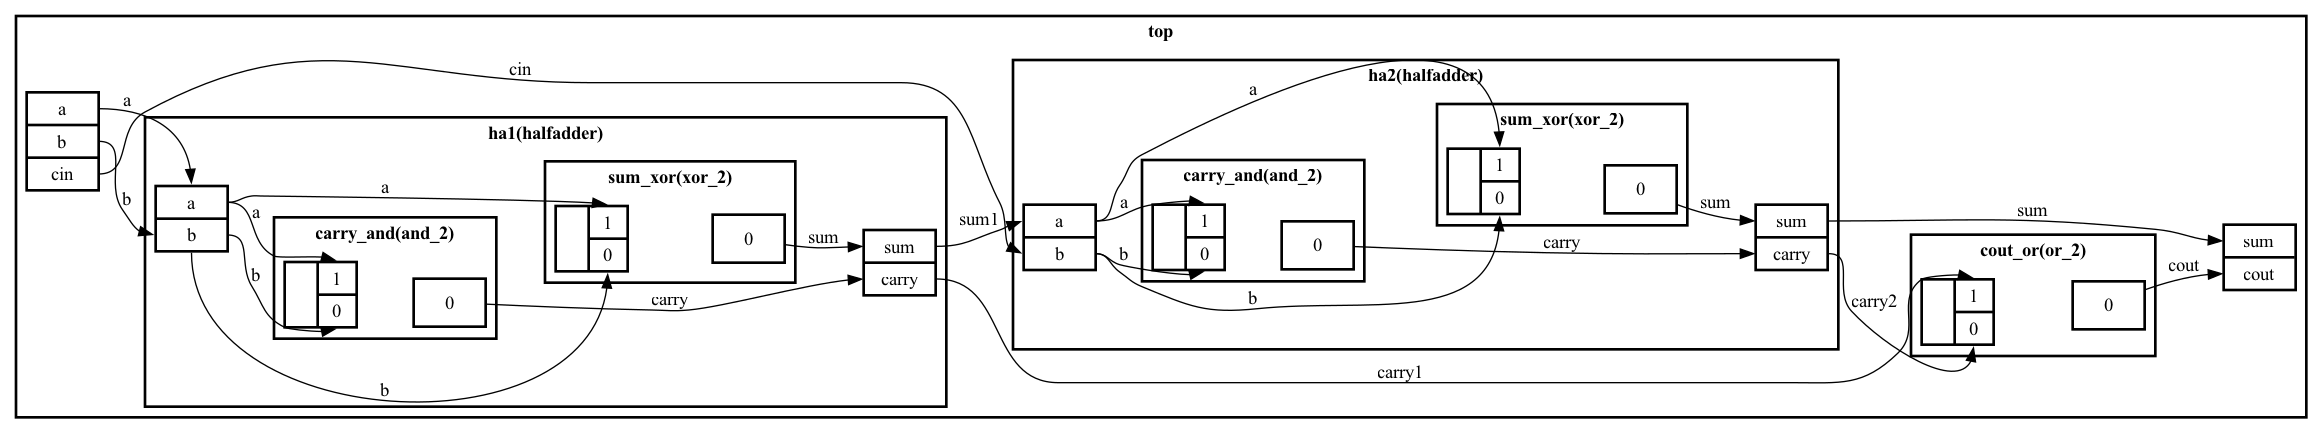

In [ ]:
top.dump_full_dot('top.dot')
!dot -Tpng top.dot -o top.png
from IPython.display import Image, display
display(Image(filename="top.png"))

You can also generate a `dot` file for a specific context, enabling you to focus on a particular instance or a specific portion of the netlist.

In the example below, we’ll focus on the instance *ha1*.

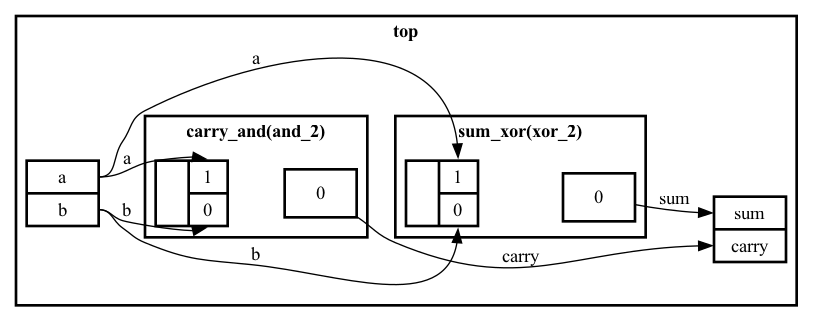

In [ ]:
ha1.dump_full_dot('ha1.dot')
!dot -Tpng ha1.dot -o ha1.png
display(Image(filename="ha1.png"))

## Dump the netlist to Verilog

`najaeda` includes also a built-in Verilog dumper that we can now use to export the design back to a Verilog file. 

Since we haven't made any modifications to the design at this point, the output should be nearly identical to the original source.

In [ ]:
top.dump_verilog('fulladder_naja.v')
!cat fulladder_naja.v

////////////////////////////////////////////////////////////////////////////////
// Mon Aug 11 17:23:16 2025
// Verilog file for fulladder
// naja version: 0.2.3
// Git hash: f18b268e
////////////////////////////////////////////////////////////////////////////////

module halfadder(input a, input b, output sum, output carry);
and carry_and(carry, a, b);

xor sum_xor(sum, a, b);
endmodule //halfadder

module fulladder(input a, input b, input cin, output sum, output cout);
wire sum1;
wire carry1;
wire carry2;

halfadder ha1 (
  .a(a),
  .b(b),
  .sum(sum1),
  .carry(carry1)
);

halfadder ha2 (
  .a(sum1),
  .b(cin),
  .sum(sum),
  .carry(carry2)
);

or cout_or(cout, carry1, carry2);
endmodule //fulladder


As we can see, the generated output closely resembles the original file. This is intentional—**najaeda emphasizes high fidelity**, ensuring that data remains consistent and stable throughout its processing pipeline.

In later chapters, we'll explore how this data integrity is preserved even after making netlist modifications.

✅ This concludes **Chapter 1** of our najaeda tutorial. In the next chapter, we’ll work with a more substantial design that includes **standard cells defined in the Liberty format**.

➡️ [**Next Chapter → Design with Primitives using Liberty**](https://colab.research.google.com/github/najaeda/najaeda-tutorials/blob/main/notebooks/02_liberty_primitives_design.ipynb)